In [163]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [139]:
train=pd.read_csv('test (1).csv')

In [140]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [141]:
train_null=train.isnull().sum()
train_null=pd.DataFrame(train_null,columns=['number']).sort_values(by='number',ascending=False)
train_null.reset_index(inplace=True)
train_null.head(20)


,index,number
0,PoolQC,1456
1,MiscFeature,1408
2,Alley,1352
3,Fence,1169
4,FireplaceQu,730
5,LotFrontage,227
6,GarageYrBlt,78
7,GarageQual,78
8,GarageFinish,78
9,GarageCond,78


In [142]:
train.drop((['PoolQC','MiscFeature','Alley','Fence']),axis=1,inplace=True)

In [143]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [144]:
train.drop(['Id'],axis=1,inplace=True)

In [145]:
train.isnull().sum()

MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 75, dtype: int64

In [146]:
train_null=train.isnull().sum()
train_null=pd.DataFrame(train_null,columns=['number']).sort_values(by='number',ascending=False)
train_null.reset_index(inplace=True)
train_null.head(30)

,index,number
0,FireplaceQu,730
1,LotFrontage,227
2,GarageQual,78
3,GarageFinish,78
4,GarageCond,78
5,GarageYrBlt,78
6,GarageType,76
7,BsmtCond,45
8,BsmtExposure,44
9,BsmtQual,44


In [147]:
train['FireplaceQu'].value_counts()

Gd    364
TA    279
Fa     41
Po     26
Ex     19
Name: FireplaceQu, dtype: int64

<AxesSubplot:>

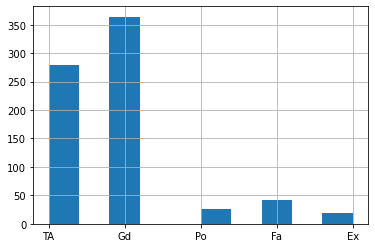

In [148]:
train['FireplaceQu'].hist()

In [149]:
train['FireplaceQu'].fillna('Gd',inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


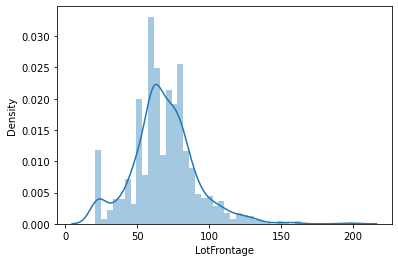

In [150]:
ax=sns.distplot(train['LotFrontage'])

In [151]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

In [152]:
train['GarageQual'].value_counts()


TA    1293
Fa      76
Gd      10
Po       2
Name: GarageQual, dtype: int64

In [153]:
train['GarageQual'].fillna('TA',inplace=True)

In [154]:
train['GarageFinish'].value_counts()

Unf    625
RFn    389
Fin    367
Name: GarageFinish, dtype: int64

In [155]:
train['GarageFinish'].fillna('Unf',inplace=True)

In [156]:
train['GarageCond'].value_counts()

TA    1328
Fa      39
Po       7
Gd       6
Ex       1
Name: GarageCond, dtype: int64

In [157]:
train['GarageCond'].fillna('Unf',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


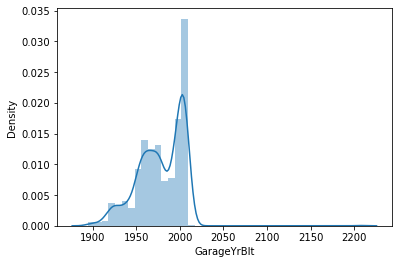

In [158]:
ax=sns.distplot(train['GarageYrBlt'])

In [159]:
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace=True)

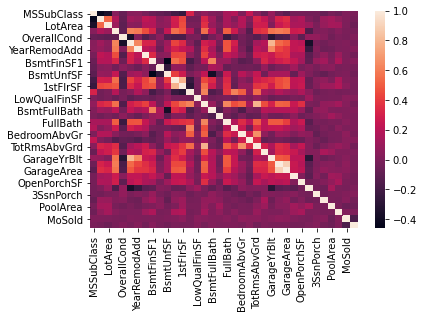

In [166]:
ax=sns.heatmap(train.corr())
